In [0]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import numpy as np

In [0]:
house_price = load_boston()
df = pd.DataFrame(house_price.data,columns = house_price.feature_names)
df['PRICE'] =  house_price.target
#print(df['PRICE'])

In [28]:
house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
#training and test data are made here
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = ['PRICE']),df['PRICE'],test_size = 0.3)
print(x_train.shape)

(354, 13)


In [0]:
#ols coefficients are calculated here, intercept is given as ols.intercept_
ols = LinearRegression().fit(x_train,y_train)
#print(ols.coef_)

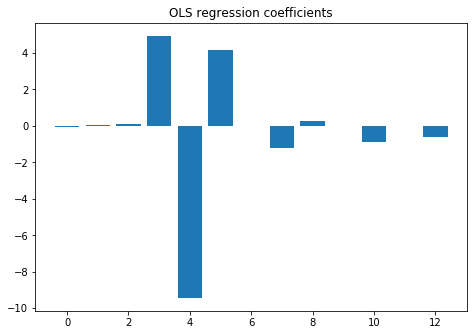

In [31]:
#bar graph is plotted here
ind = np.array([i for i in range(ols.coef_.size)])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,ols.coef_)
plt.title("OLS regression coefficients")
plt.show()

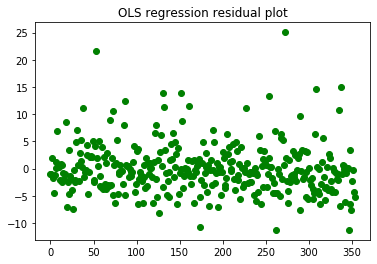

In [32]:
#residual for ols prediction
ans = []
y_train_ans = ols.predict(x_train)
ind = np.array([i for i in range(y_train.size)])
# print(type(y_train))
# print(type(y_train_ans)) y_train is of type pandas series and y_train is of type np array, we can access pandas series using iloc and not by [i]
for i in range(y_train.size):
  ans.append(y_train.iloc[i]-y_train_ans[i])
plt.scatter(y = ans, x = ind,color = 'green')
plt.title("OLS regression residual plot")
plt.show()
mean_training_error = []
mean_test_error = []
regression_type = []

In [33]:
#mean training error
mean_training_error.append(sklearn.metrics.mean_squared_error(ols.predict(x_train),y_train))
mean_test_error.append(sklearn.metrics.mean_squared_error(ols.predict(x_test),y_test))
regression_type.append("OLS")
print(sklearn.metrics.mean_squared_error(ols.predict(x_test),y_test))
print(sklearn.metrics.mean_squared_error(ols.predict(x_train),y_train))

28.01343962115611
20.739133217534746


ridge regression


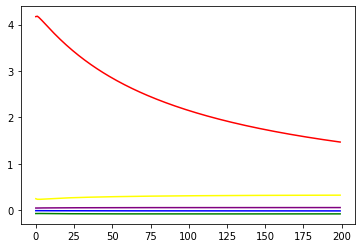

In [34]:
attr = []
crime = []
room = []
tax = []
rz = []
ha = []
ind = np.array([i for i in range(200)])
names = ['Crime','Room','Tax','Residential Zone','Highway Access']
for I in range(200):
  ridge = Ridge(alpha = float(I))
  ridge.fit(x_train,y_train)
  crime.append(ridge.coef_[0])#crime,room,tax,rz,ha
  room.append(ridge.coef_[5])
  tax.append(ridge.coef_[9])
  rz.append(ridge.coef_[1])
  ha.append(ridge.coef_[8])
attr.append(crime)
attr.append(room)
attr.append(tax)
attr.append(rz)
attr.append(ha)
c = ['green','red','blue','purple','yellow']
for i in range(5):
  plt.plot(ind,attr[i],color = c[i])
plt.show()

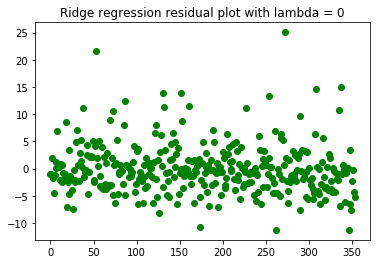

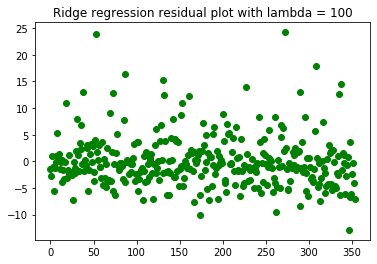

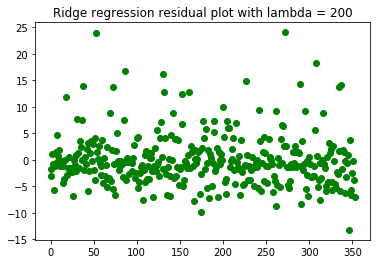

In [35]:
Alpha = [0,100,200]
for i in range(3):
  ans = []
  ridge = Ridge(alpha = Alpha[i])
  ridge.fit(x_train,y_train)
  y_train_ans = ridge.predict(x_train)
  ind = np.array([i for i in range(y_train.size)])
  for j in range(y_train.size):
    ans.append(y_train.iloc[j]-y_train_ans[j])
  plt.scatter(y = ans, x = ind,color = 'green')
  plt.title("Ridge regression residual plot with lambda = "+str(Alpha[i]))
  plt.show()
  mean_training_error.append(sklearn.metrics.mean_squared_error(y_train_ans,y_train))
  mean_test_error.append(sklearn.metrics.mean_squared_error(ridge.predict(x_test),y_test))
  regression_type.append("Ridge with lambda = "+str(Alpha[i]))

LASSO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3670.8265795036446, tolerance: 3.149009254237289
  positive)


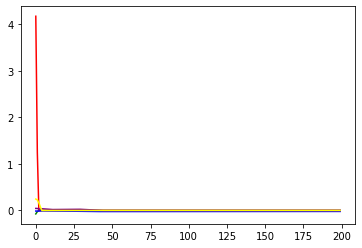

In [36]:
attr = []
crime = []
room = []
tax = []
rz = []
ha = []
ind = np.array([i for i in range(200)])
for I in range(200):
  lasso = Lasso(alpha = float(I))
  lasso.fit(x_train,y_train)
  crime.append(lasso.coef_[0])#crime,room,tax,rz,ha
  room.append(lasso.coef_[5])
  tax.append(lasso.coef_[9])
  rz.append(lasso.coef_[1])
  ha.append(lasso.coef_[8])
attr.append(crime)
attr.append(room)
attr.append(tax)
attr.append(rz)
attr.append(ha)
c = ['green','red','blue','purple','yellow']
for i in range(5):
  plt.plot(ind,attr[i],color = c[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3670.8265795036446, tolerance: 3.149009254237289
  positive)


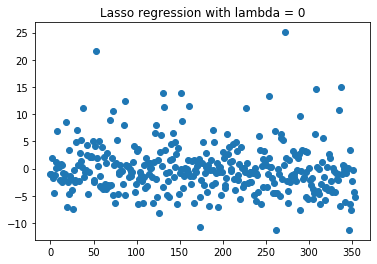

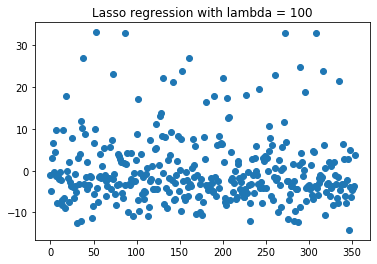

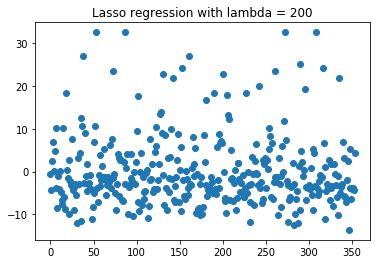

In [45]:
Alpha = [0,100,200]
for i in range(3):
  lasso = Lasso(alpha = Alpha[i])
  lasso.fit(x_train,y_train)
  ans = []
  ind = np.array([I for I in range(y_train.size)])
  y_train_ans = lasso.predict(x_train)
  for j in range(y_train.size):
    ans.append(y_train.iloc[j]-y_train_ans[j])
  plt.scatter(x = ind,y = ans)
  plt.title("Lasso regression with lambda = "+str(Alpha[i]))
  plt.show()
  mean_training_error.append(sklearn.metrics.mean_squared_error(y_train_ans,y_train))
  mean_test_error.append(sklearn.metrics.mean_squared_error(lasso.predict(x_test),y_test))
  regression_type.append("Lasso regression with lambda = "+str(Alpha[i]))

In [0]:
last = []
for i in range(7):
  last.append((regression_type[i],mean_training_error[i],mean_test_error[i]))
result = pd.DataFrame(last)
result.rename(columns = {0:"Regression Type",1:"Mean training error",2:"Mean test error"},inplace = True)

In [47]:
result

,Regression Type,Mean training error,Mean test error
0,OLS,20.739133,28.013440
1,Ridge with lambda = 0,20.739133,28.013440
2,Ridge with lambda = 100,23.064827,27.376087
3,Ridge with lambda = 200,24.245710,27.842903
4,Lasso regression with lambda = 0,20.739133,28.013440
5,Lasso regression with lambda = 5,36.797804,35.738367
6,Lasso regression with lambda = 50,65.298282,62.363110
